In [2]:
%load_ext autoreload
%autoreload 2
import pdf_processor.form_creator as f_c
from smart_forms_types.models import *
import pdf2image
import matplotlib.pyplot as plt

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


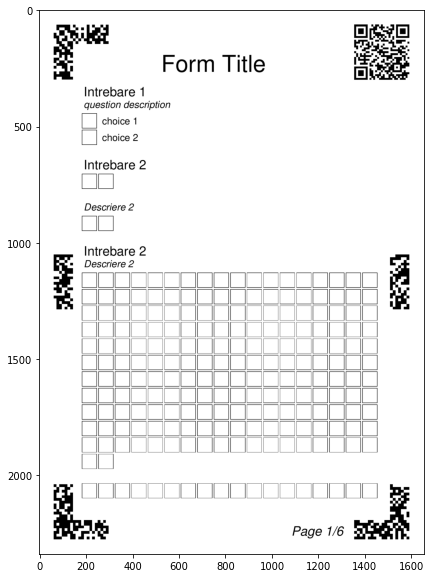

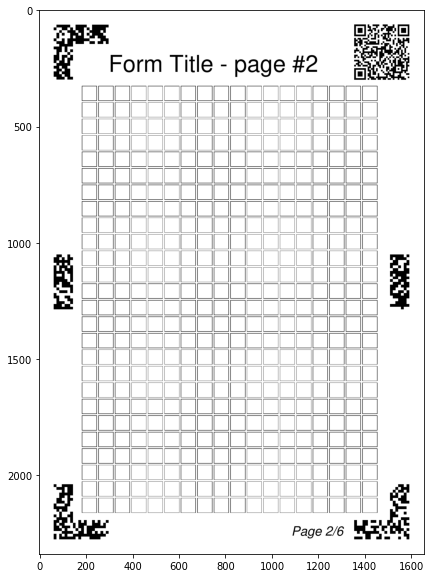

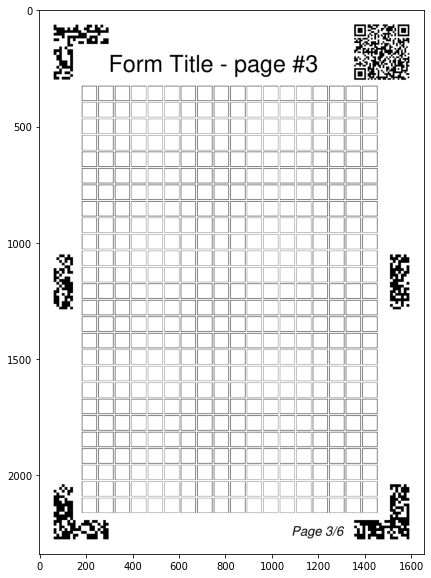

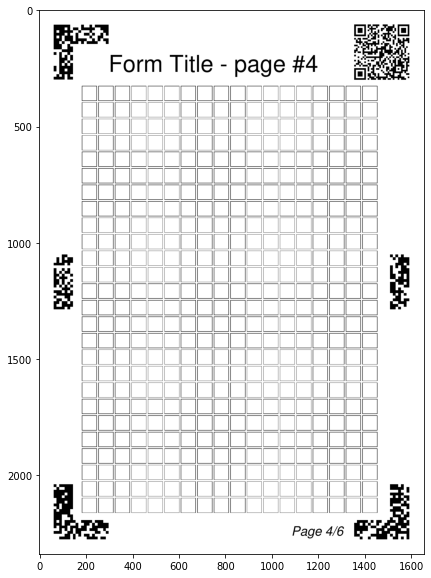

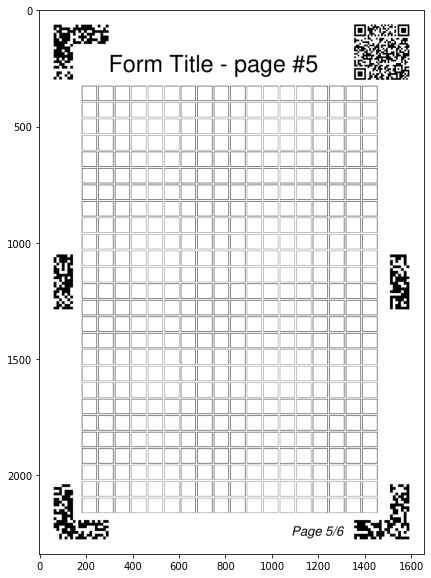

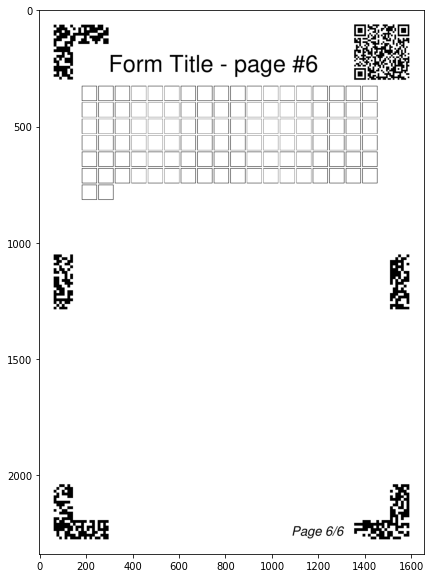

In [24]:
form = f_c.create_form_from_description(
    FormDescription(
        title="Form Title",
        description="Form description",
        canBeFilledOnline=False,
        needsToBeSignedInToSubmit=False,
        questions=[
            FormMultipleChoiceQuestion(
                title="Intrebare 1",
                description="question description",
                choices=[
                    "choice 1",
                    "choice 2"
                ]
            ),
            FormTextQuestion(
                title="Intrebare 2",
                description="",
                maxAnswerLength=2
            ),
            FormTextQuestion(
                title="",
                description="Descriere 2",
                maxAnswerLength=2
            ),
            FormTextQuestion(
                title="Intrebare 2",
                description="Descriere 2",
                maxAnswerLength=200
            ),
            FormTextQuestion(
                title="",
                description="",
                maxAnswerLength=2000
            )
        ]
    ),
    False
)

imgs = pdf2image.convert_from_bytes(form.extract_raw_pdf_bytes())

with open("file.pdf", "wb") as fout:
    fout.write(form.extract_raw_pdf_bytes())

for i in imgs:
    plt.figure(figsize=(15, 10))
    plt.imshow(i)
    plt.show()
